In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import utils
import pickle
from scipy.optimize import minimize
import newfig_utils as utils

In [2]:
plt.rcParams['axes.facecolor'] = '#EEEEEE'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 2.0

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

In [3]:
rotations = np.arange(0.0,390.0,30.0)
rotations_rad = (rotations * np.pi) / 180

In [4]:
filename = 'data/forAbhi/Velocity_MeanSEM.mat'
data = scipy.io.loadmat(filename)
T4_arclight_mean = data['Arcmean'][5:110,:]
T4_arclight_sem = data['ArcSE'][5:110,:]

T4_gcamp_mean = data['Gmean'][5:110,:]
T4_gcamp_sem = data['GSE'][5:110,:]

#T4_arclight_mean.shape

In [5]:
filename = 'data/forAbhi/Contrast_MeanSEM.mat'
data = scipy.io.loadmat(filename)
T4_arclight_contrast_mean = data['Arcmean'][5:110,:]
T4_arclight_contrast_sem = data['ArcSE'][5:110,:]

T4_gcamp_contrast_mean = data['Gmean'][5:110,:]
T4_gcamp_contrast_sem = data['GSE'][5:110,:]

In [6]:
#Reading Ldir mean with sem values
filename = 'data/PeakandDSIwithSEMdata/LDirValues.mat'
data = scipy.io.loadmat(filename) # Arc-Velocity,SEM,Arc-Contrast ,SEM,GCaMP-Velocity,SEM,GCaMP-Contrast,SEM
gcamp_grating_speed_ldir = data['LDirValues'][:,[4,5]] #first column is for mean, second for sem
arclight_grating_speed_ldir = data['LDirValues'][:,[0,1]]
gcamp_grating_contrast_ldir = data['LDirValues'][:,[6,7]][::-1] #rows are reveresed to go from 10% to 100% contrast
arclight_grating_contrast_ldir = data['LDirValues'][:,[2,3]][::-1]

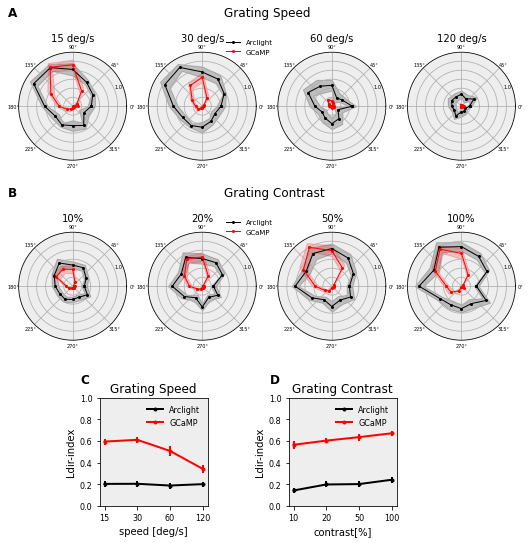

In [7]:
def plot_fig3():
    f= plt.figure(figsize=(7.5,10))
    
    data_list = [T4_arclight_mean, T4_gcamp_mean]
    sem_list = [T4_arclight_sem, T4_gcamp_sem]
    speed = [15,30,60,120]
    peak_tuning, peak_tuning_sem = utils.calc_peaktuning(data_list, sem_list, speed, contrast=False)
    axis_title = ['15 deg/s', '30 deg/s', '60 deg/s', '120 deg/s']
    utils.plot_polars(peak_tuning, peak_tuning_sem,0.85,axis_title)
    
    Ldir = utils.calc_Ldir(peak_tuning)
    Ldir_speed_mag = Ldir[:,:,1]
    
    
    data_list = [T4_arclight_contrast_mean, T4_gcamp_contrast_mean]
    sem_list = [T4_arclight_contrast_sem, T4_gcamp_contrast_sem]
    contrast = [10,20,50,100]
    peak_tuning, peak_tuning_sem = utils.calc_peaktuning(data_list, sem_list, speed=contrast, contrast=True)
    axis_title = ['10%', '20%', '50%', '100%']
    utils.plot_polars(peak_tuning, peak_tuning_sem,0.60, axis_title)
    
    #Ldir = utils.calc_Ldir(peak_tuning)
    #Ldir_contrast_mag = Ldir[:,:,1]
    
    xticklabel=[speed,contrast]
    
    #Ldir_mag = [Ldir_speed_mag, Ldir_contrast_mag]
    utils.plot_Ldir([arclight_grating_speed_ldir, gcamp_grating_speed_ldir,
                    arclight_grating_contrast_ldir, gcamp_grating_contrast_ldir],'contrast [%]',['k','r'],['Arclight','GCaMP'],xticklabel,yoffs=0.27)
    
    f.text(0.03,0.95,'A',weight='bold',fontsize=12)
    f.text(0.03,0.70,'B',weight='bold',fontsize=12)
    f.text(0.165,0.44,'C',weight='bold',fontsize=12)
    f.text(0.515,0.44,'D',weight='bold',fontsize=12)
    f.text(0.43,0.95,'Grating Speed',fontsize=12)
    f.text(0.43,0.70,'Grating Contrast',fontsize=12)
    
    plt.savefig('figures/new_figures/figure3.pdf',dpi=1000, bbox_inches='tight')
    
plot_fig3()

In [17]:
gcamp_grating_contrast_ldir, arclight_grating_contrast_ldir, gcamp_grating_speed_ldir, arclight_grating_speed_ldir

(array([[0.56494, 0.03509],
        [0.60342, 0.0256 ],
        [0.63573, 0.03205],
        [0.67146, 0.02246]]),
 array([[0.14183, 0.02084],
        [0.19749, 0.02756],
        [0.20102, 0.02551],
        [0.2412 , 0.0279 ]]),
 array([[0.59467, 0.02766],
        [0.61097, 0.02837],
        [0.50796, 0.04307],
        [0.34233, 0.03726]]),
 array([[0.20273, 0.02833],
        [0.20377, 0.0284 ],
        [0.18765, 0.02758],
        [0.20067, 0.02234]]))